## importing neccesary libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Coca_cola_project\Datasets\coca_cola_dataset.csv", delimiter=",")

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.048145,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.047072,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.047430,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.046357,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.045881,2035200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15589 non-null  object 
 1   Open       15589 non-null  float64
 2   High       15589 non-null  float64
 3   Low        15589 non-null  float64
 4   Close      15589 non-null  float64
 5   Adj Close  15589 non-null  float64
 6   Volume     15589 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 852.7+ KB


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.value_counts()

Date        Open       High       Low        Close      Adj Close  Volume  
1962-01-02  0.263021   0.270182   0.263021   0.263021   0.048145   806400      1
2003-05-15  22.250000  22.490000  22.225000  22.320000  12.111475  8908800     1
2003-04-04  21.055000  21.299999  20.575001  20.950001  11.368076  8908400     1
2003-04-07  21.275000  21.330000  20.799999  20.850000  11.313811  10194400    1
2003-04-08  20.975000  21.025000  20.805000  20.924999  11.354507  6925600     1
                                                                              ..
1982-09-22  0.875000   0.901042   0.875000   0.877604   0.304806   24792000    1
1982-09-23  0.877604   0.898438   0.875000   0.895833   0.311137   19344000    1
1982-09-24  0.893229   0.893229   0.885417   0.888021   0.308424   13411200    1
1982-09-27  0.888021   0.914063   0.888021   0.914063   0.317468   5203200     1
2023-12-05  58.549999  58.830002  58.419998  58.660000  58.660000  11880000    1
Name: count, Length: 15589, dtype

## Data cleaning

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
df.drop(columns=['Date'], inplace=True)

In [15]:
df.to_csv('final_dataset_for_training.csv', index=False)

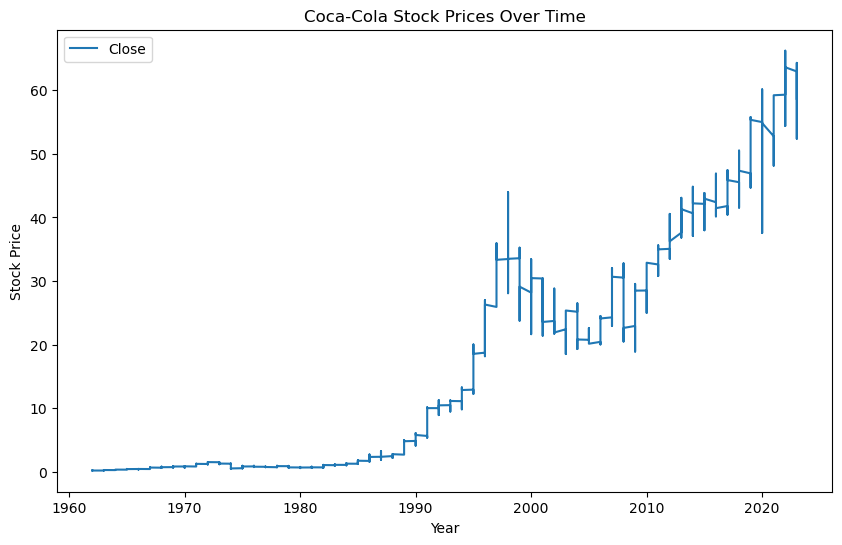

In [16]:
df.plot(x='Year', y='Close', figsize=(10, 6), title='Coca-Cola Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,0.263021,0.270182,0.263021,0.263021,0.048145,806400,2,1,1962
1,0.259115,0.259115,0.253255,0.257161,0.047072,1574400,3,1,1962
2,0.257813,0.261068,0.257813,0.259115,0.047430,844800,4,1,1962
3,0.259115,0.262370,0.252604,0.253255,0.046357,1420800,5,1,1962
4,0.251302,0.251302,0.245768,0.250651,0.045881,2035200,8,1,1962


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15589 non-null  float64
 1   High       15589 non-null  float64
 2   Low        15589 non-null  float64
 3   Close      15589 non-null  float64
 4   Adj Close  15589 non-null  float64
 5   Volume     15589 non-null  int64  
 6   Day        15589 non-null  int32  
 7   Month      15589 non-null  int32  
 8   Year       15589 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 913.5 KB


In [19]:
df.drop(columns=['Adj Close'], inplace= True)

In [20]:
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,0.263021,0.270182,0.263021,0.263021,806400,2,1,1962
1,0.259115,0.259115,0.253255,0.257161,1574400,3,1,1962
2,0.257813,0.261068,0.257813,0.259115,844800,4,1,1962
3,0.259115,0.262370,0.252604,0.253255,1420800,5,1,1962
4,0.251302,0.251302,0.245768,0.250651,2035200,8,1,1962


## Visualization

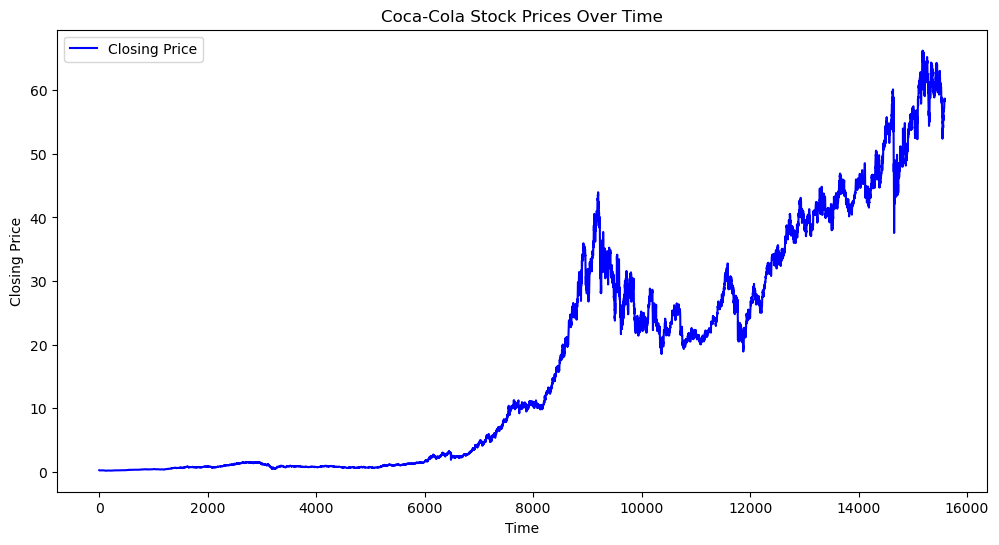

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Coca-Cola Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [22]:
import plotly.graph_objects as go

In [23]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

In [24]:
fig.update_layout(title='Coca-Cola Stock Candlestick Chart',
                  xaxis_title='Time',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)

fig.show()

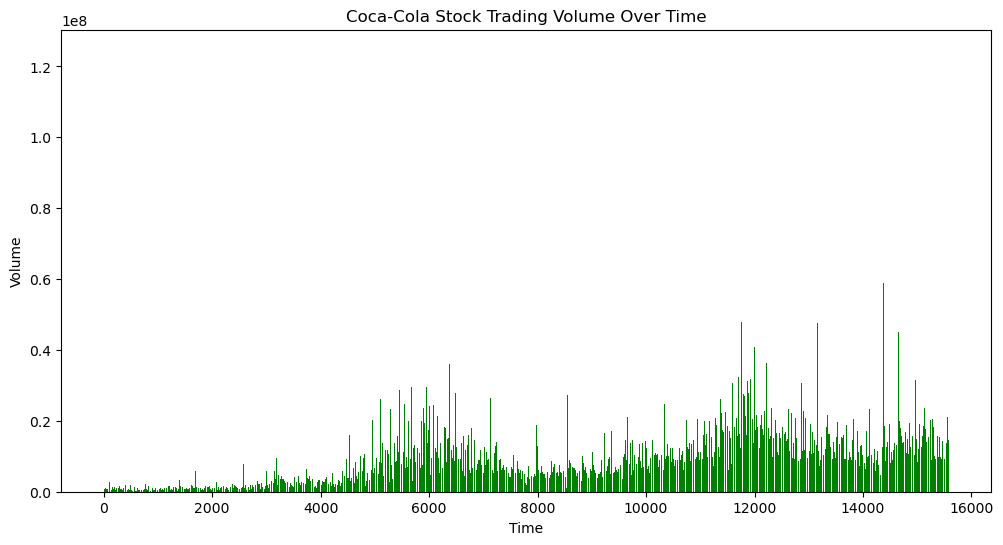

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='green')
plt.title('Coca-Cola Stock Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [26]:
corr = df.corr()

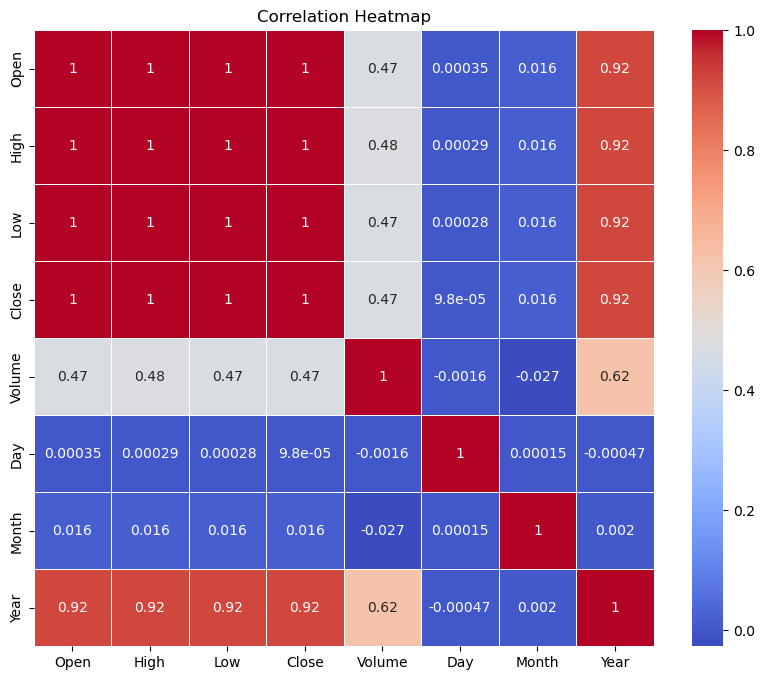

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

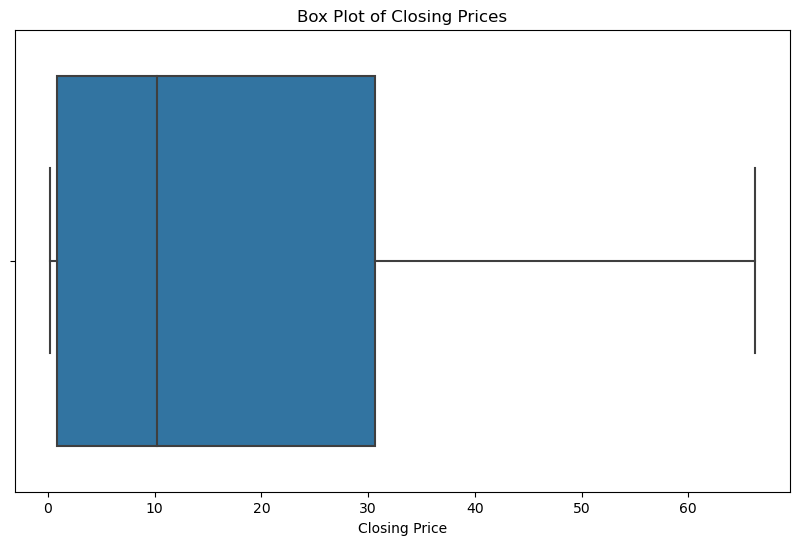

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

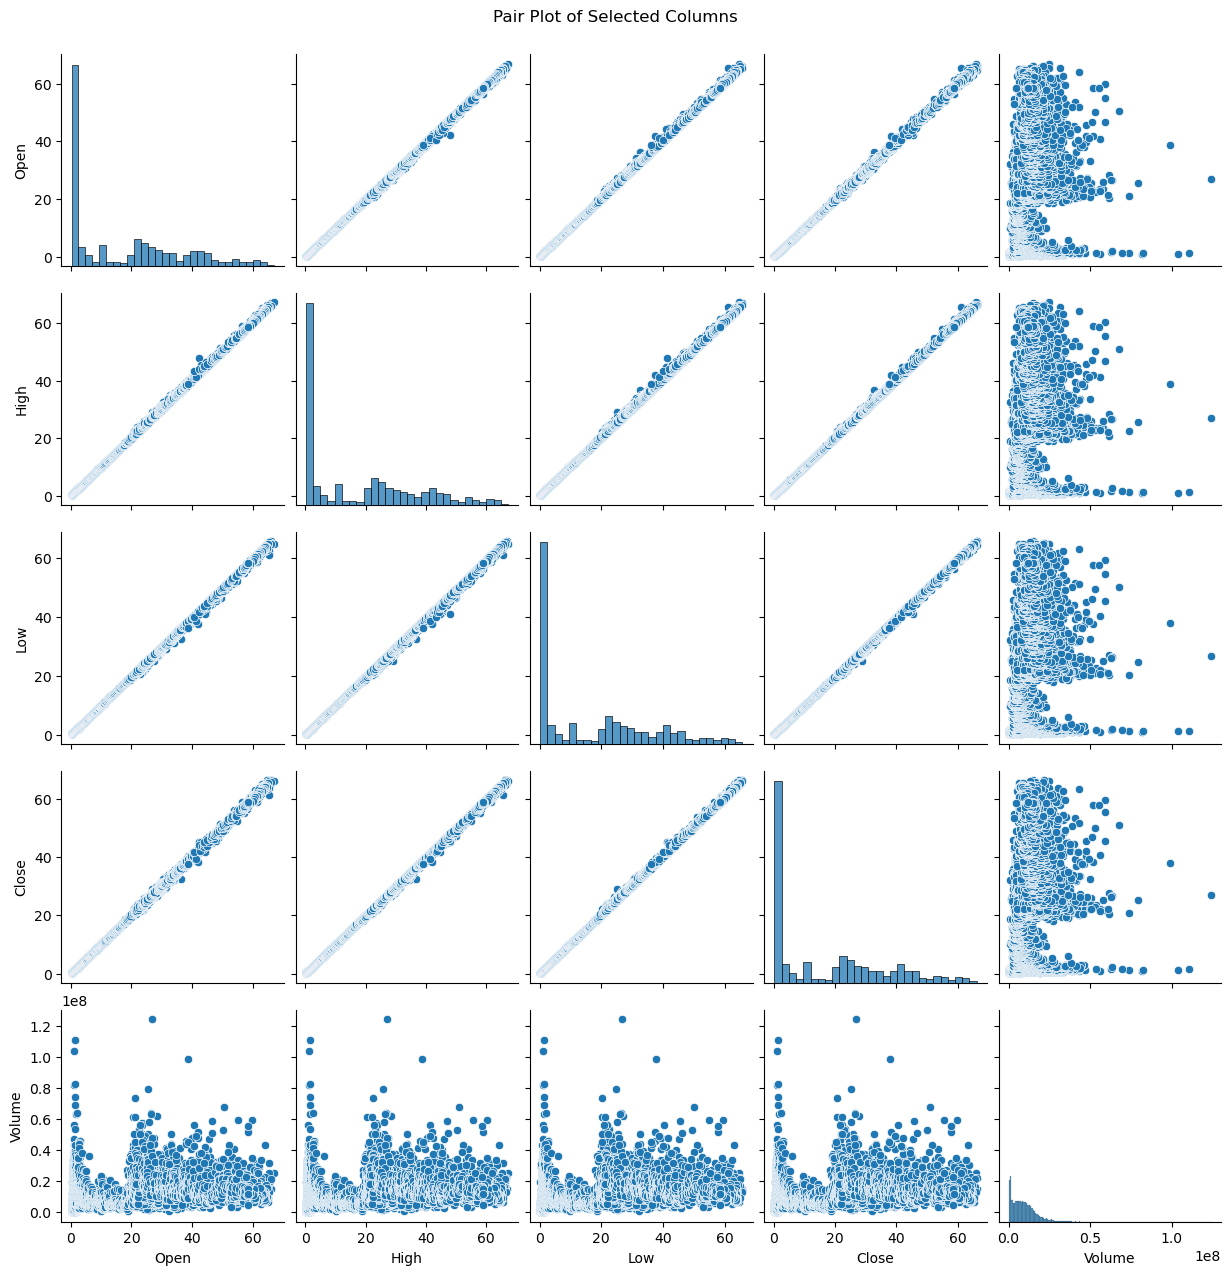

In [29]:
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

## Feature Selection

In [30]:
X = df.iloc[:, :3].join(df.iloc[:, 4:])
y = df.iloc[:, 3]

In [31]:
X.head()

,Open,High,Low,Volume,Day,Month,Year
0,0.263021,0.270182,0.263021,806400,2,1,1962
1,0.259115,0.259115,0.253255,1574400,3,1,1962
2,0.257813,0.261068,0.257813,844800,4,1,1962
3,0.259115,0.262370,0.252604,1420800,5,1,1962
4,0.251302,0.251302,0.245768,2035200,8,1,1962


In [32]:
y.head()

0    0.263021
1    0.257161
2    0.259115
3    0.253255
4    0.250651
Name: Close, dtype: float64

In [33]:
X.shape

(15589, 7)

In [34]:
y.shape

(15589,)

## Model training

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12471, 7), (3118, 7), (12471,), (3118,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [39]:
linear = LinearRegression()

In [40]:
linear.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = linear.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
print(r2_score(y_test, y_pred))

0.999961496205167


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
forest = RandomForestRegressor()

In [46]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred_forest = forest.predict(X_test)

In [48]:
print(r2_score(y_test, y_pred_forest))

0.9999296175582696


In [49]:
d_tree = DecisionTreeRegressor()

In [50]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
y_pred_tree = d_tree.predict(X_test)

In [52]:
print(r2_score(y_test, y_pred_tree))

0.9998680650115864


In [56]:
import pickle
file=open(r'C:\Users\Admin\OneDrive\Desktop\Coca_cola_project\models\predictionModel.pkl','wb')
pickle.dump(forest, file)
file.close()

In [57]:
import pickle
file=open(r'C:\Users\Admin\OneDrive\Desktop\Coca_cola_project\models\StandardScaler.pkl','wb')
pickle.dump(forest, file)
file.close()